<a href="https://colab.research.google.com/github/bongkyunSON/Quant_Factor/blob/main/%EB%B3%80%EB%8F%99%EC%84%B1_%EC%BA%90%EB%A6%AC_%EC%A0%84%EB%9E%B5_%EA%B5%AC%ED%98%84_221228.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 패키지 설치
!pip install pickle5 --quiet

     |████████████████████████████████| 132 kB 7.0 MB/s 


In [2]:
# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle5 as pickle
sns.set()

In [3]:
# 데이터 로드
with open('vol_price.pkl', 'rb') as f:
    df = pickle.load(f)

In [4]:
# VIX 선물 가격 데이터
price = df.iloc[:, 0]

# VIX 기간구조 기울기 데이터
slope = df.iloc[:, 1]

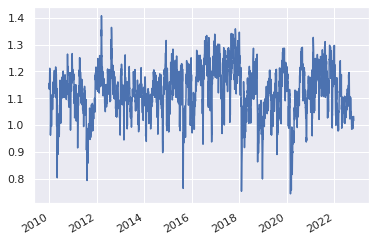

In [5]:
slope.plot()

In [6]:
# 변동성 캐리 전략 구현 클래스
class VolatilityCarry:

    # 초기화 함수
    def __init__(self, price, slope):

        # 변동성 선물 가격
        self.price = price

        # 수익률
        self.rets = self.price.pct_change()

        # 기간구조 기울기
        self.slope = slope

        # 거래비용
        self.cost = 0.002

        # 가중치
        self.weights = self.calculate_weights(self.slope)

        # 포트폴리오 수익률
        self.port_rets = self.calculate_returns(self.rets, self.weights, self.cost)

        # 백테스팅 결과 시각화
        self.plot_port_returns(self.port_rets)

        # 샤프비율
        self.sharpe_ratio = self.calculate_sharpe_ratio(self.port_rets)

    # 가중치 계산 함수
    def calculate_weights(self, slope):
        
        # 롱 포지션
        long_weights = (slope < 1) * 1

        # 숏 포지션
        short_weights = (slope > 1) * -1

        # 토탈 포지션
        total_weights = long_weights + short_weights

        return total_weights


    # 포트폴리오 수익률 계산
    def calculate_returns(self, rets, weights, cost):
        port_rets = weights.shift() * rets - abs(weights.diff()) * cost

        return port_rets


    # 샤프비율 계산
    def calculate_sharpe_ratio(self, total_returns):
        sharpe_ratio = total_returns.mean() * np.sqrt(252) / total_returns.std()
        return sharpe_ratio

    # 백테스팅 결과 시각화
    def plot_port_returns(self, rets):
        plt.figure(figsize=(12, 6))
        rets.cumsum().plot(label='port')
        plt.show()

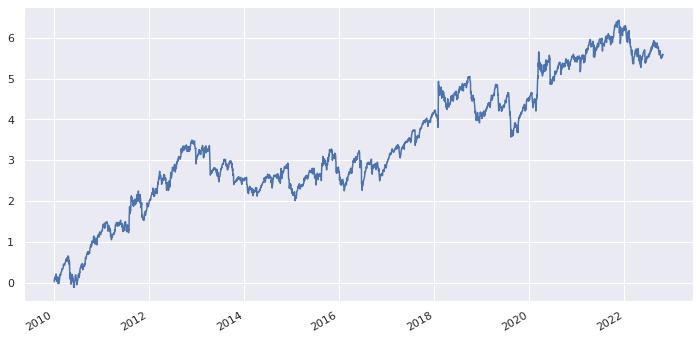

In [7]:
carry = VolatilityCarry(price, slope)

In [8]:
carry.sharpe_ratio

0.47504945217096034

Copyright 2022. 퀀트대디. All rights reserved.